In [60]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import tensorflow as tf
import seaborn as sns
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'tensorflow'

# Dataset
## Data Used From UCI Machine Learning Repository
### source: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [32]:
dataset_columns = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_point_temp', 'radiation', 'rain', 'snow', 'functional']
df = pd.read_csv('Data/SeoulBikeData.csv', encoding='latin1').drop(['Date', 'Holiday', 'Seasons'], axis=1)

In [33]:
df.columns = dataset_columns
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_point_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [34]:
df.columns

Index(['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility',
       'dew_point_temp', 'radiation', 'rain', 'snow', 'functional'],
      dtype='object')

In [35]:
# converting functioning day into numbers 
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis =1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_point_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


C:\Users\user\AppData\Local\Temp\ipykernel_8040\3675568925.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


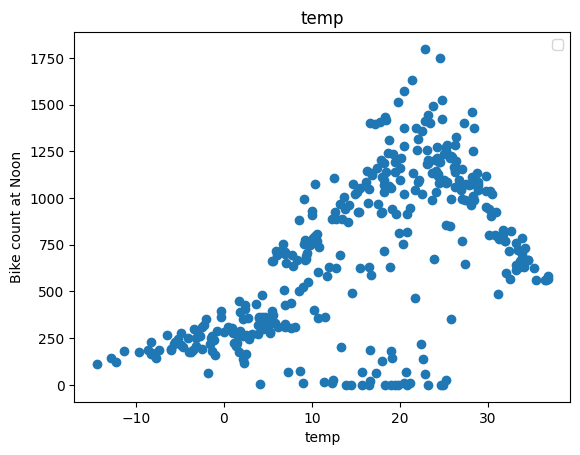

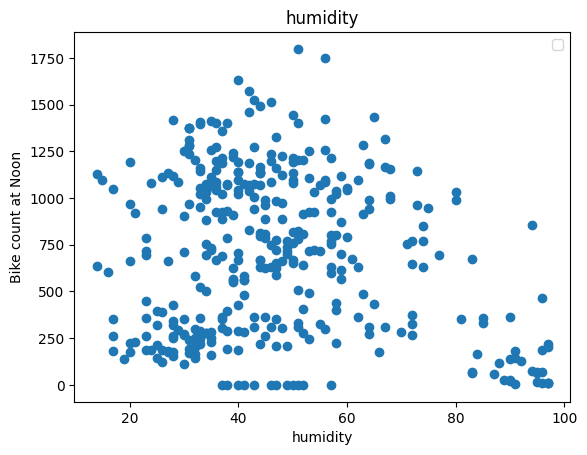

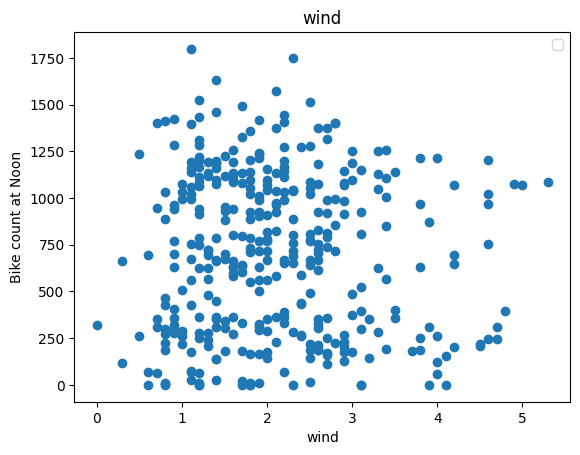

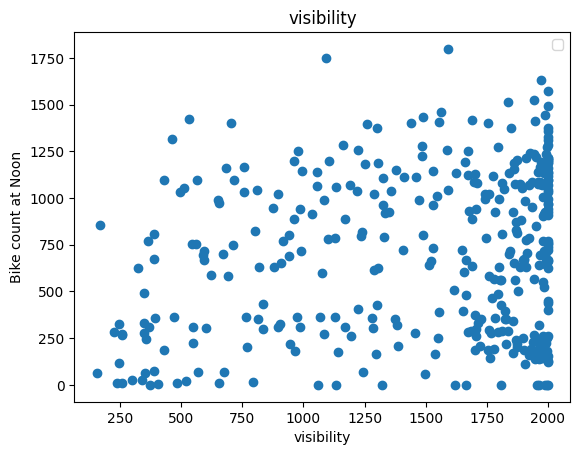

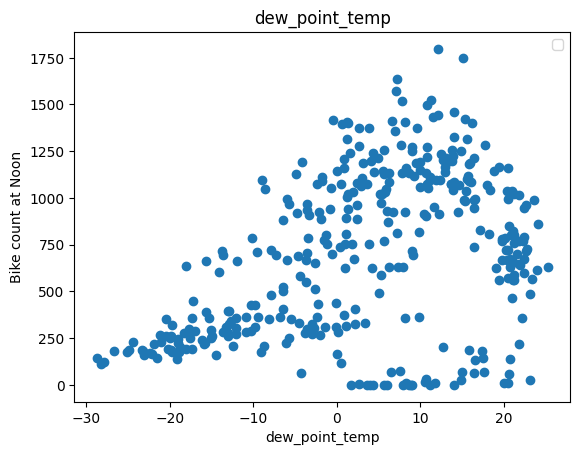

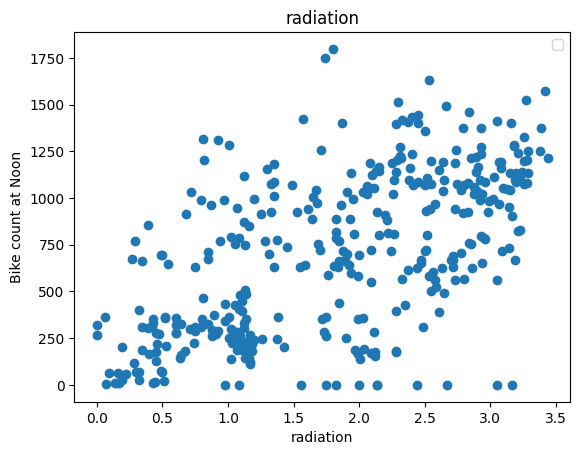

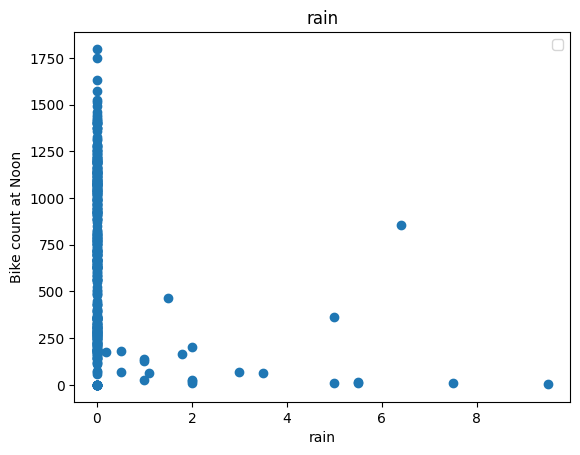

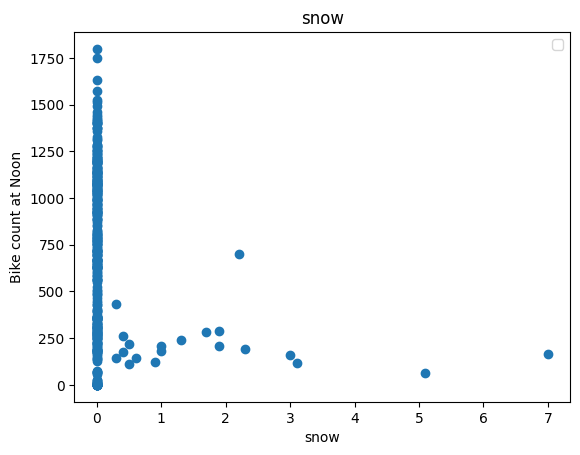

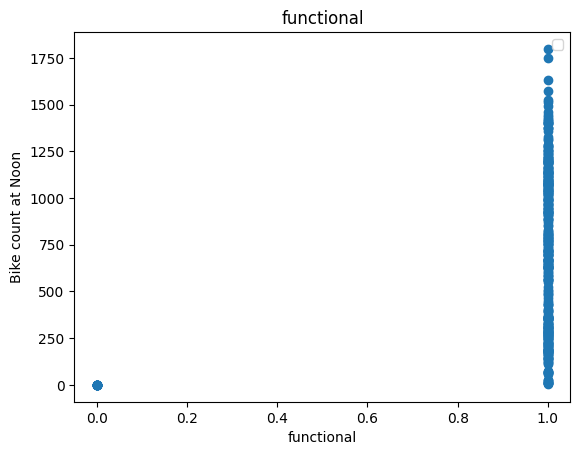

In [37]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.ylabel("Bike count at Noon")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [38]:
df = df.drop(['wind', 'visibility', 'functional'], axis=1)

In [39]:
df.head()

,bike_count,temp,humidity,dew_point_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train / Validation / Test

In [41]:
train, validate, test =  np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [47]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if not x_labels:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

In [48]:
_, X_train_temp, y_train_temp = get_xy(df, 'bike_count', x_labels = ['temp'])
_, X_tvalidate_temp, y_validate_temp = get_xy(df, 'bike_count', x_labels = ['temp'])
_, X_test_temp, y_test_temp = get_xy(df, 'bike_count', x_labels = ['temp'])

In [50]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [52]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.84124918]] [377.18970415]


In [53]:
temp_reg.score(X_test_temp, y_test_temp)

0.330867186499053

NameError: name 'tf' is not defined

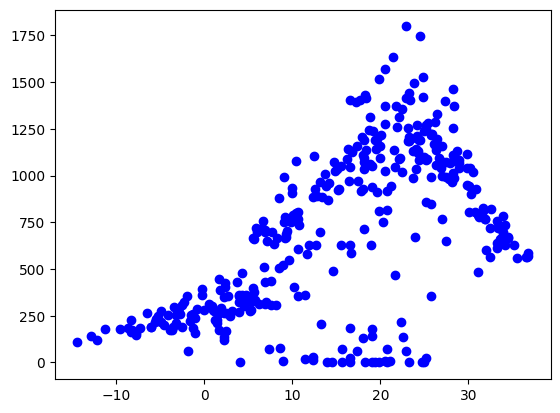

In [55]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linespace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikes vs Temperature')
plt.ylabel('Numbers of bikes')
plt.xlabel('Temp')
plt.show()